In [61]:
import utils
import pymongo
from pymongo import MongoClient, UpdateOne, ASCENDING
import time
from tqdm import tqdm
from web3 import Web3
from quickblocks import QuickBlocks
import calculations
import holoviews as hv
import importlib
hv.extension('matplotlib')
client = MongoClient('localhost', 27017)
db = client['eth']
accounts = db['accounts']
transactions = db['transactions']
blocks = db['blocks']

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [4]:
provider_ipc = Web3.IPCProvider('/home/mike/.local/share/io.parity.ethereum/jsonrpc2.ipc', timeout=100)
w3 = Web3(provider_ipc)
LATEST = 2000000
STEP = 100000
qb = QuickBlocks('http://localhost:8544', cache=False)

In [3]:
cps, cps_ex1 = calculations.calculate_counterparties(accounts, transactions, LATEST, STEP)

35863it [00:00, 56985.53it/s]
0it [00:00, ?it/s]

from 0 to 100000
total cps 40856 total accounts 14878 cp/acct 2.746068019895147
total cps ex1 31572 total accounts ex1 5593 cp/accts 5.644913284462722



94823it [00:01, 49264.22it/s]
0it [00:00, ?it/s]

from 100000 to 200000
total cps 58946 total accounts 19143 cp/acct 3.0792456772710652
total cps ex1 48635 total accounts ex1 8831 cp/accts 5.507303816102366



119591it [00:02, 48212.16it/s]
0it [00:00, ?it/s]

from 200000 to 300000
total cps 69934 total accounts 21591 cp/acct 3.23903478301144
total cps ex1 58866 total accounts ex1 10522 cp/accts 5.59456377114617



129722it [00:02, 49408.71it/s]
0it [00:00, ?it/s]

from 300000 to 400000
total cps 78028 total accounts 23623 cp/acct 3.303052110231554
total cps ex1 66205 total accounts ex1 11799 cp/accts 5.611068734638529



133602it [00:02, 47666.02it/s]
0it [00:00, ?it/s]

from 400000 to 500000
total cps 92770 total accounts 28527 cp/acct 3.2520068706839136
total cps ex1 77808 total accounts ex1 13564 cp/accts 5.736360955470363



162200it [00:03, 47306.09it/s]
0it [00:00, ?it/s]

from 500000 to 600000
total cps 103448 total accounts 31997 cp/acct 3.2330530987280057
total cps ex1 86331 total accounts ex1 14879 cp/accts 5.802204449223738



168273it [00:03, 43266.91it/s]
0it [00:00, ?it/s]

from 600000 to 700000
total cps 113250 total accounts 34279 cp/acct 3.3037719886811168
total cps ex1 95458 total accounts ex1 16485 cp/accts 5.790597512890507



248722it [00:06, 35969.58it/s]
0it [00:00, ?it/s]

from 700000 to 800000
total cps 124108 total accounts 37149 cp/acct 3.340816711082398
total cps ex1 105178 total accounts ex1 18217 cp/accts 5.77361804907504



253487it [00:06, 36325.54it/s]
0it [00:00, ?it/s]

from 800000 to 900000
total cps 147090 total accounts 43455 cp/acct 3.3848809112875387
total cps ex1 125902 total accounts ex1 22265 cp/accts 5.65470469346508



336872it [00:09, 36417.56it/s]
0it [00:00, ?it/s]

from 900000 to 1000000
total cps 206466 total accounts 61230 cp/acct 3.3719745222929935
total cps ex1 177830 total accounts ex1 32592 cp/accts 5.456246931762395



388204it [00:10, 38175.78it/s]
0it [00:00, ?it/s]

from 1000000 to 1100000
total cps 285992 total accounts 85397 cp/acct 3.348970104336218
total cps ex1 251072 total accounts ex1 50473 cp/accts 4.97438234303489



520716it [00:14, 36967.35it/s]
0it [00:00, ?it/s]

from 1100000 to 1200000
total cps 407506 total accounts 119769 cp/acct 3.402433016890848
total cps ex1 365656 total accounts ex1 77908 cp/accts 4.6934332802793035



558774it [00:16, 34748.56it/s]
0it [00:00, ?it/s]

from 1200000 to 1300000
total cps 487840 total accounts 139004 cp/acct 3.509539293833271
total cps ex1 441324 total accounts ex1 92472 cp/accts 4.772514923436283



558789it [00:15, 36749.22it/s]
0it [00:00, ?it/s]

from 1300000 to 1400000
total cps 555588 total accounts 155027 cp/acct 3.583814432324692
total cps ex1 505201 total accounts ex1 104620 cp/accts 4.82891416555152



640401it [00:17, 36628.79it/s]
0it [00:00, ?it/s]

from 1400000 to 1500000
total cps 690510 total accounts 185849 cp/acct 3.7154356493712637
total cps ex1 632362 total accounts ex1 127677 cp/accts 4.952826272547131



750885it [00:21, 35294.85it/s]
0it [00:00, ?it/s]

from 1500000 to 1600000
total cps 890648 total accounts 233033 cp/acct 3.8219822943531603
total cps ex1 820687 total accounts ex1 163044 cp/accts 5.03353082603469



699776it [00:20, 34981.34it/s]
0it [00:00, ?it/s]

from 1600000 to 1700000
total cps 1038168 total accounts 269591 cp/acct 3.8509000671387397
total cps ex1 961002 total accounts ex1 192395 cp/accts 4.994942696016008



807335it [00:23, 34040.76it/s]
0it [00:00, ?it/s]

from 1700000 to 1800000
total cps 1216008 total accounts 315829 cp/acct 3.850210082038065
total cps ex1 1128837 total accounts ex1 228619 cp/accts 4.937634229875907



655876it [00:18, 35175.27it/s]

from 1800000 to 1900000
total cps 1339802 total accounts 351401 cp/acct 3.8127438453504685
total cps ex1 1247832 total accounts ex1 259392 cp/accts 4.81060325684678



:Overlay
   .Unique_Counterparties.All_accounts                                 :Curve   [x]   (y)
   .Unique_Counterparties.Excluding_accounts_with_only_one_transaction :Curve   [x]   (y)
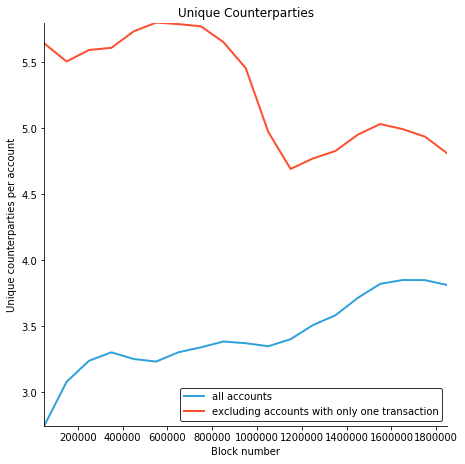

In [4]:
%%output size=200
group = "Unique Counterparties"
acct_curve    = hv.Curve((range(0, LATEST,STEP), cps), label='all accounts', group=group)
acct_excl_curve = hv.Curve((range(0, LATEST,STEP), cps_ex1),label='excluding accounts with only one transaction', group=group)
options = {'Curve': dict(interpolation='steps-mid'),
           'Overlay': dict(legend_position='bottom_right')}
curve = (acct_curve * acct_excl_curve)
curve.options(options)
curve.redim.label(x='Block number', y='Unique counterparties per account')

In [5]:
cps, cps_ex1 = calculations.calculate_transactions(accounts, transactions, LATEST, STEP)

35863it [00:00, 65451.88it/s]
0it [00:00, ?it/s]

from 0 to 100000
total txs 35863 total accounts 5796 cps/accts 6.187543133195307
total txs ex1 27281 total accounts ex1 1600 txs/accts 17.050625



94823it [00:01, 48292.02it/s]
0it [00:00, ?it/s]

from 100000 to 200000
total txs 130686 total accounts 8776 cps/accts 14.891294439380127
total txs ex1 118695 total accounts ex1 3210 txs/accts 36.97663551401869



119591it [00:02, 48015.08it/s]
0it [00:00, ?it/s]

from 200000 to 300000
total txs 250277 total accounts 10270 cps/accts 24.369717624148002
total txs ex1 236626 total accounts ex1 4047 txs/accts 58.46948356807512



129722it [00:02, 48137.34it/s]
0it [00:00, ?it/s]

from 300000 to 400000
total txs 379999 total accounts 11505 cps/accts 33.0290308561495
total txs ex1 364937 total accounts ex1 4581 txs/accts 79.66317397948046



133602it [00:02, 44958.64it/s]
0it [00:00, ?it/s]

from 400000 to 500000
total txs 513601 total accounts 13129 cps/accts 39.11958260339706
total txs ex1 496671 total accounts ex1 5346 txs/accts 92.90516273849607



162200it [00:03, 42557.40it/s]
0it [00:00, ?it/s]

from 500000 to 600000
total txs 675801 total accounts 14363 cps/accts 47.05152126992968
total txs ex1 657472 total accounts ex1 5966 txs/accts 110.20315119007711



168273it [00:04, 40190.75it/s]
0it [00:00, ?it/s]

from 600000 to 700000
total txs 844074 total accounts 15914 cps/accts 53.03971345984667
total txs ex1 823981 total accounts ex1 6888 txs/accts 119.62558072009291



248722it [00:08, 29806.30it/s]
0it [00:00, ?it/s]

from 700000 to 800000
total txs 1092796 total accounts 17559 cps/accts 62.235662623156216
total txs ex1 1070798 total accounts ex1 7635 txs/accts 140.24859201047806



253487it [00:08, 31598.58it/s]
0it [00:00, ?it/s]

from 800000 to 900000
total txs 1346283 total accounts 21038 cps/accts 63.99291757771651
total txs ex1 1320239 total accounts ex1 8918 txs/accts 148.04204978694776



336872it [00:10, 30696.45it/s]
0it [00:00, ?it/s]

from 900000 to 1000000
total txs 1683155 total accounts 30122 cps/accts 55.877929752340485
total txs ex1 1646549 total accounts ex1 11530 txs/accts 142.80563746747615



388204it [00:11, 32969.57it/s]
0it [00:00, ?it/s]

from 1000000 to 1100000
total txs 2071359 total accounts 46916 cps/accts 44.150375138545485
total txs ex1 2016054 total accounts ex1 16402 txs/accts 122.91513230093891



520716it [00:17, 29837.89it/s]
0it [00:00, ?it/s]

from 1100000 to 1200000
total txs 2592075 total accounts 72855 cps/accts 35.578546427836116
total txs ex1 2507274 total accounts ex1 22164 txs/accts 113.12371413102328



558774it [00:20, 26639.53it/s]
0it [00:00, ?it/s]

from 1200000 to 1300000
total txs 3150849 total accounts 86387 cps/accts 36.47364765531851
total txs ex1 3050845 total accounts ex1 26471 txs/accts 115.25235163008576



558789it [00:21, 26567.57it/s]
0it [00:00, ?it/s]

from 1300000 to 1400000
total txs 3709638 total accounts 97028 cps/accts 38.23265449148699
total txs ex1 3597702 total accounts ex1 30179 txs/accts 119.21210112992478



640401it [00:26, 24617.03it/s]
0it [00:00, ?it/s]

from 1400000 to 1500000
total txs 4350039 total accounts 120000 cps/accts 36.250325
total txs ex1 4212505 total accounts ex1 37862 txs/accts 111.25944218477629



750885it [00:31, 23630.40it/s]
0it [00:00, ?it/s]

from 1500000 to 1600000
total txs 5100924 total accounts 155689 cps/accts 32.763547842172535
total txs ex1 4918867 total accounts ex1 48254 txs/accts 101.93697931777676



699776it [00:31, 22413.11it/s]
0it [00:00, ?it/s]

from 1600000 to 1700000
total txs 5800700 total accounts 184369 cps/accts 31.46244759151484
total txs ex1 5586858 total accounts ex1 54709 txs/accts 102.11954157451243



807335it [00:36, 22211.31it/s]
0it [00:00, ?it/s]

from 1700000 to 1800000
total txs 6608035 total accounts 220909 cps/accts 29.912927947706976
total txs ex1 6353313 total accounts ex1 62934 txs/accts 100.95199733053676



655876it [00:29, 22342.63it/s]


from 1800000 to 1900000
total txs 7263911 total accounts 251241 cps/accts 28.91212421539478
total txs ex1 6976528 total accounts ex1 67423 txs/accts 103.47400738620352



:Overlay
   .Transactions.All_accounts                                 :Curve   [x]   (y)
   .Transactions.Excluding_accounts_with_only_one_transaction :Curve   [x]   (y)
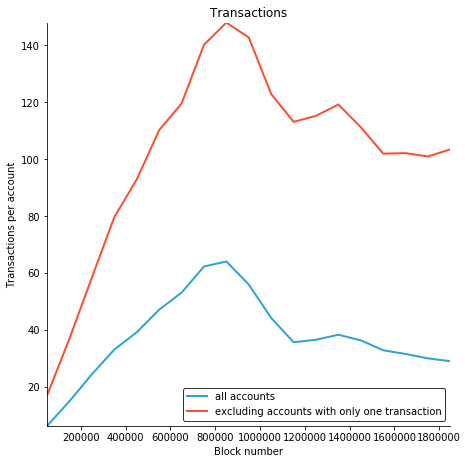

In [6]:
%%output size=200
group = "Transactions"
acct_curve    = hv.Curve((range(0, LATEST,STEP), cps), label='all accounts', group=group)
acct_excl_curve = hv.Curve((range(0, LATEST,STEP), cps_ex1),label='excluding accounts with only one transaction', group=group)
options = {'Curve': dict(interpolation='steps-mid'),
           'Overlay': dict(legend_position='bottom_right')}
curve = (acct_curve * acct_excl_curve)
curve.options(options)
curve.redim.label(x='Block number', y='Transactions per account')

In [7]:
balances = calculations.calculate_balances(w3, 1, accounts, sort=True)

In [ ]:
# in the historical dbs, we can put the wealth percentiles of every account
# so we can get the subset of accounts by wealth, accurate within 100k blocks